This project will take a look at how Earth compares to the 4296 exoplanets (planets not within our solar system) confirmed by NASA in their Confirmed Exoplanets dataset.

In [64]:
import pandas as pd
import math as math
import numpy as np
pd.options.display.max_columns = None

import matplotlib
import matplotlib.pyplot as plt
# important! Need to tell Jupyter to display plots within the notebook
%matplotlib inline

In [2]:
import requests

resp = requests.get('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&format=json')
txt = resp.json()
imprt = pd.DataFrame(txt)
imprt

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,Kepler-138,c,Kepler-138 c,Transit,0,3,13.781300,0.000100,-0.000100,0.0,9,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,1,0.00620,0.00602,-0.00352,0.0,4,Mass,0.107,0.006,-0.006,0.0,9,6.2,5.8,-3.4,0.0,3,1,1,0,19h21m31.57s,+43d17m34.7s,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,-0.11,0.0,4,12.925,NaN,0.0,Kepler-band,12.472,None,0.0,3841.00,49.00,-49.00,0.0,10,0.52,0.06,-0.06,0.0,9,0.44,0.02,-0.02,0.0,11,2,2015-06-17,Kepler
1,Kepler-138,d,Kepler-138 d,Transit,0,3,23.088100,0.000900,-0.000800,0.0,7,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,1,0.00201,0.00212,-0.00122,0.0,3,Mass,0.108,0.007,-0.007,0.0,8,2.1,2.2,-1.2,0.0,3,1,1,0,19h21m31.57s,+43d17m34.7s,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,-0.11,0.0,4,12.925,NaN,0.0,Kepler-band,12.472,None,0.0,3841.00,49.00,-49.00,0.0,10,0.52,0.06,-0.06,0.0,9,0.44,0.02,-0.02,0.0,11,2,2015-06-17,Kepler
2,Kepler-139,b,Kepler-139 b,Transit,0,2,15.771044,0.000037,-0.000037,0.0,4,0.127,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.262,0.051,-0.051,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,18h49m34.07s,+43d53m21.7s,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,-4.26,0.0,3,12.701,NaN,0.0,Kepler-band,12.677,None,0.0,5594.00,100.00,-100.00,0.0,6,NaN,NaN,NaN,NaN,2,1.30,0.25,-0.25,0.0,6,1,2014-05-14,Kepler
3,Kepler-139,c,Kepler-139 c,Transit,0,2,157.072878,0.001720,-0.001720,0.0,4,0.586,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.302,0.062,-0.062,0.0,3,NaN,NaN,NaN,NaN,0,1,1,0,18h49m34.07s,+43d53m21.7s,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,-4.26,0.0,3,12.701,NaN,0.0,Kepler-band,12.677,None,0.0,5594.00,100.00,-100.00,0.0,6,NaN,NaN,NaN,NaN,2,1.30,0.25,-0.25,0.0,6,1,2014-05-14,Kepler
4,Kepler-140,b,Kepler-140 b,Transit,0,2,3.254270,0.000008,-0.000008,0.0,4,0.045,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.144,0.028,-0.028,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,19h09m28.67s,+46d46m05.6s,287.369468,0.000017,46.768213,0.000017,2,593.80,7.20,-7.20,0.0,3,12.996,NaN,0.0,Kepler-band,12.941,None,0.0,6077.00,136.00,-136.00,0.0,6,NaN,NaN,NaN,NaN,1,1.29,0.24,-0.24,0.0,6,1,2014-05-14,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,Kepler-1514,c,Kepler-1514 c,Transit,0,2,10.514100,NaN,NaN,0.0,2,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,None,0.118,NaN,NaN,0.0,1,NaN,NaN,NaN,0.0,0,0,1,0,19h30m30.59s,+37d51m36.5s,292.627466,0.000017,37.860133,0.000017,2,379.00,20.87,-18.36,0.0,3,11.690,NaN,0.0,Kepler-band,11.829,None,0.0,6251.00,81.98,-87.80,0.0,3,1.21,0.04,-0.04,0.0,1,1.22,0.06,-0.05,0.0,3,0,2020-09-03,Kepler
4297,Kepler-1698,b,Kepler-1698 b,Transit,0,1,1.210700,NaN,NaN,0.0,2,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,None,0.096,NaN,NaN,0.0,1,NaN,NaN,NaN,0.

Here I am filtering and cleaning the dataset. With use of the Data Column Definitions Documentation (ref: https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html), I use drop to delete data that is not relevant to the analysis I want to undertake on the dataset, and at the same time give more readable names to the relevant data. I also extracted data on the year of the last update from the column 'date of last update', as year will be more useful for visualisations over long periods of time.
*** EDIT: Maybe get rid of year thing, include bit about Earth mass and radius created to make better comparisons to Earth (point of the project).

In [3]:
df = imprt
df = df.drop(columns = ['pl_letter', 'pl_controvflag', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbsmaxn', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_orbincln', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radjerr2', 'pl_radjlim', 'pl_denserr2', 'pl_denslim', 'pl_densn', 'ra_str', 'dec_str', 'st_disterr2', 'st_distlim', 'st_optmaglim', 'gaia_gmaglim', 'st_tefferr2', 'st_tefflim', 'st_masserr2', 'st_masslim', 'st_raderr2', 'st_radlim'], axis=1)

df = df.rename(columns = {'pl_hostname': 'Star name', 'pl_name' : 'Planet name', 'pl_discmethod' : 'Discovery method', 'pl_pnum' : 'Number of planets in the stellar system', 'pl_orbper' : 'Days in a year', 'pl_orbpererr1' : 'Days in a year error (+/-)', 'pl_orbpern' : 'Year length number of measurements', 'pl_orbeccen' : 'Eccentricity', 'pl_orbeccenerr1' : 'Eccentricity error (+/-)', 'pl_orbeccenn' : 'Eccentricity number of measurements', 'pl_bmassj' : 'Planet mass (compared to Jupiter)', 'pl_bmassjerr1' : 'Planet mass error (+/-)', 'pl_bmassn' : 'Planet mass number of measurements', 'pl_radj' : 'Planet radius (compared to Jupiter)', 'pl_radjerr1' : 'Planet radius error (+/-)', 'pl_radn' : 'Planet radius number of measurements', 'pl_dens' : 'Planet density', 'pl_denserr1' : 'Density error (+/-)', 'pl_densn' : 'Planet density number of measurements', 'pl_ttvflag' : 'TTV Flag', 'pl_kepflag' : 'Kepler Field data', 'pl_k2flag' : 'K2 Mission data', 'ra' : 'Right acsension', 'st_raerr' : 'RA error', 'dec' : 'Declination', 'st_decerr' : 'Declination error', 'st_posn' : 'Right incline and declination number of measurements', 'st_dist' : 'Star distance in Parsecs', 'st_disterr1' : 'Distance error (+/-)', 'st_distn' : 'Distance number of measurements', 'st_optmag' : 'Optical magnitude', 'st_optmagerr' : 'Optical magnitude error', 'st_optband' : 'Optical magnitude band', 'gaia_gmag' : 'Gaia magnitude', 'gaia_gmagerr' : 'Gaia magnitude error', 'st_teff' : 'Star temperature', 'st_tefferr1' : 'Temperature error (+/-)', 'st_teffn' : 'Temperature number of measurements', 'st_mass' : 'Star mass (compared to the Sun)', 'st_masserr1' : 'Star mass error (+/-)', 'st_massn' : 'Star mass number of measurements', 'st_rad' : 'Star radius (compared to the Sun)', 'st_raderr1' : 'Star radius error (+/-)', 'st_radn' : 'Star radius number of measurements', 'pl_nnotes' : 'Number of notes taken on planet', 'rowupdate' : 'Date of last update', 'pl_facility' : 'Discovery facility'})


mass_e = round((df['Planet mass (compared to Jupiter)'] / 0.0031463520), 5)
#must round mass_e to 5d.p., as this is the highest accuracy we can quote it to, given the planet masses provided are all quoted to an accuracy of 5d.p.

df.insert(13, 'Planet mass (compared to Earth)', mass_e)

rad_e = round((df['Planet radius (compared to Jupiter)'] / 0.08921), 3)
#must round rad_e to 3d.p., as this is the highest accuracy we can quote it to, given the planet radii provided are all quoted to an accuracy of 3d.p.

df.insert(17, 'Planet radius (compared to Earth)', rad_e)

year_e = round((df['Days in a year'] / 365.240000), 6)

df.insert(6, 'Earth years in a year', year_e)

df

,Star name,Planet name,Discovery method,Number of planets in the stellar system,Days in a year,Days in a year error (+/-),Earth years in a year,Year length number of measurements,Eccentricity,Eccentricity error (+/-),Eccentricity number of measurements,Planet mass (compared to Jupiter),Planet mass error (+/-),Planet mass number of measurements,Planet mass (compared to Earth),Planet radius (compared to Jupiter),Planet radius error (+/-),Planet radius number of measurements,Planet radius (compared to Earth),Planet density,Density error (+/-),TTV Flag,Kepler Field data,K2 Mission data,Right acsension,RA error,Declination,Declination error,Right incline and declination number of measurements,Star distance in Parsecs,Distance error (+/-),Distance number of measurements,Optical magnitude,Optical magnitude error,Optical magnitude band,Gaia magnitude,Gaia magnitude error,Star temperature,Temperature error (+/-),Temperature number of measurements,Star mass (compared to the Sun),Star mass error (+/-),Star mass number of measurements,Star radius (compared to the Sun),Star radius error (+/-),Star radius number of measurements,Number of notes taken on planet,Date of last update,Discovery facility
0,Kepler-138,Kepler-138 c,Transit,3,13.781300,0.000100,0.037732,9,NaN,NaN,3,0.00620,0.00602,4,1.97054,0.107,0.006,9,1.199,6.2,5.8,1,1,0,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,4,12.925,NaN,Kepler-band,12.472,None,3841.00,49.00,10,0.52,0.06,9,0.44,0.02,11,2,2015-06-17,Kepler
1,Kepler-138,Kepler-138 d,Transit,3,23.088100,0.000900,0.063214,7,NaN,NaN,3,0.00201,0.00212,3,0.63884,0.108,0.007,8,1.211,2.1,2.2,1,1,0,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,4,12.925,NaN,Kepler-band,12.472,None,3841.00,49.00,10,0.52,0.06,9,0.44,0.02,11,2,2015-06-17,Kepler
2,Kepler-139,Kepler-139 b,Transit,2,15.771044,0.000037,0.043180,4,NaN,NaN,0,NaN,NaN,0,NaN,0.262,0.051,3,2.937,NaN,NaN,0,1,0,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,3,12.701,NaN,Kepler-band,12.677,None,5594.00,100.00,6,NaN,NaN,2,1.30,0.25,6,1,2014-05-14,Kepler
3,Kepler-139,Kepler-139 c,Transit,2,157.072878,0.001720,0.430054,4,NaN,NaN,0,NaN,NaN,0,NaN,0.302,0.062,3,3.385,NaN,NaN,1,1,0,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,3,12.701,NaN,Kepler-band,12.677,None,5594.00,100.00,6,NaN,NaN,2,1.30,0.25,6,1,2014-05-14,Kepler
4,Kepler-140,Kepler-140 b,Transit,2,3.254270,0.000008,0.008910,4,NaN,NaN,0,NaN,NaN,0,NaN,0.144,0.028,3,1.614,NaN,NaN,0,1,0,287.369468,0.000017,46.768213,0.000017,2,593.80,7.20,3,12.996,NaN,Kepler-band,12.941,None,6077.00,136.00,6,NaN,NaN,1,1.29,0.24,6,1,2014-05-14,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,Kepler-1514,Kepler-1514 c,Transit,2,10.514100,NaN,0.028787,2,NaN,NaN,0,NaN,NaN,0,NaN,0.118,NaN,1,1.323,NaN,NaN,0,1,0,292.627466,0.000017,37.860133,0.000017,2,379.00,20.87,3,11.690,NaN,Kepler-band,11.829,None,6251.00,81.98,3,1.21,0.04,1,1.22,0.06,3,0,2020-09-03,Kepler
4297,Kepler-1698,Kepler-1698 b,Transit,1,1.210700,NaN,0.003315,2,NaN,NaN,0,NaN,NaN,0,NaN,0.096,NaN,1,1.076,NaN,NaN,0,1,0,293.344989,0.000017,39.257812,0.000017,2,223.78,1.20,1,12.914,NaN,Kepler-band,12.876,None,4945.83,74.17,2,NaN,NaN,0,0.74,0.02,2,0,2020-09-03,Kepler
4298,Kepler-1699,Kepler-1699 b,Transit,1,3.490820,NaN,0.009558,2,NaN,NaN,0,NaN,NaN,0,NaN,0.140,NaN,1,1.569,NaN,NaN,0,1,0,292.137336,0.000017,48.917194,0.000017,2,NaN,NaN,0,14.678,NaN,Kepler-band,14.661,None,5214.40,221.45,2,NaN,NaN,0,NaN,NaN,1,0,2020-09-03,Kepler
4299,Kepler-1700,Kepler-1700 b,Transit,1,234.239000,NaN,0.641329,2,NaN,NaN,0,NaN,NaN,0,NaN,0.259,NaN,1,2.903,NaN,NaN,0,1,0,286.949712,0.000017,45.353828,0.000017,2,732.73,8.87,1,13.685,NaN,Kepler-band,13.629,None,5885.00,59.00,2,NaN,NaN,0,1.14,0.01,2,0,2020-09-03,Kepler


In [4]:
year = df['Date of last update'].str.split('-').str[0].tolist()
df.insert(45, 'Year of last update', year)
df

,Star name,Planet name,Discovery method,Number of planets in the stellar system,Days in a year,Days in a year error (+/-),Earth years in a year,Year length number of measurements,Eccentricity,Eccentricity error (+/-),Eccentricity number of measurements,Planet mass (compared to Jupiter),Planet mass error (+/-),Planet mass number of measurements,Planet mass (compared to Earth),Planet radius (compared to Jupiter),Planet radius error (+/-),Planet radius number of measurements,Planet radius (compared to Earth),Planet density,Density error (+/-),TTV Flag,Kepler Field data,K2 Mission data,Right acsension,RA error,Declination,Declination error,Right incline and declination number of measurements,Star distance in Parsecs,Distance error (+/-),Distance number of measurements,Optical magnitude,Optical magnitude error,Optical magnitude band,Gaia magnitude,Gaia magnitude error,Star temperature,Temperature error (+/-),Temperature number of measurements,Star mass (compared to the Sun),Star mass error (+/-),Star mass number of measurements,Star radius (compared to the Sun),Star radius error (+/-),Year of last update,Star radius number of measurements,Number of notes taken on planet,Date of last update,Discovery facility
0,Kepler-138,Kepler-138 c,Transit,3,13.781300,0.000100,0.037732,9,NaN,NaN,3,0.00620,0.00602,4,1.97054,0.107,0.006,9,1.199,6.2,5.8,1,1,0,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,4,12.925,NaN,Kepler-band,12.472,None,3841.00,49.00,10,0.52,0.06,9,0.44,0.02,2015,11,2,2015-06-17,Kepler
1,Kepler-138,Kepler-138 d,Transit,3,23.088100,0.000900,0.063214,7,NaN,NaN,3,0.00201,0.00212,3,0.63884,0.108,0.007,8,1.211,2.1,2.2,1,1,0,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,4,12.925,NaN,Kepler-band,12.472,None,3841.00,49.00,10,0.52,0.06,9,0.44,0.02,2015,11,2,2015-06-17,Kepler
2,Kepler-139,Kepler-139 b,Transit,2,15.771044,0.000037,0.043180,4,NaN,NaN,0,NaN,NaN,0,NaN,0.262,0.051,3,2.937,NaN,NaN,0,1,0,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,3,12.701,NaN,Kepler-band,12.677,None,5594.00,100.00,6,NaN,NaN,2,1.30,0.25,2014,6,1,2014-05-14,Kepler
3,Kepler-139,Kepler-139 c,Transit,2,157.072878,0.001720,0.430054,4,NaN,NaN,0,NaN,NaN,0,NaN,0.302,0.062,3,3.385,NaN,NaN,1,1,0,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,3,12.701,NaN,Kepler-band,12.677,None,5594.00,100.00,6,NaN,NaN,2,1.30,0.25,2014,6,1,2014-05-14,Kepler
4,Kepler-140,Kepler-140 b,Transit,2,3.254270,0.000008,0.008910,4,NaN,NaN,0,NaN,NaN,0,NaN,0.144,0.028,3,1.614,NaN,NaN,0,1,0,287.369468,0.000017,46.768213,0.000017,2,593.80,7.20,3,12.996,NaN,Kepler-band,12.941,None,6077.00,136.00,6,NaN,NaN,1,1.29,0.24,2014,6,1,2014-05-14,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,Kepler-1514,Kepler-1514 c,Transit,2,10.514100,NaN,0.028787,2,NaN,NaN,0,NaN,NaN,0,NaN,0.118,NaN,1,1.323,NaN,NaN,0,1,0,292.627466,0.000017,37.860133,0.000017,2,379.00,20.87,3,11.690,NaN,Kepler-band,11.829,None,6251.00,81.98,3,1.21,0.04,1,1.22,0.06,2020,3,0,2020-09-03,Kepler
4297,Kepler-1698,Kepler-1698 b,Transit,1,1.210700,NaN,0.003315,2,NaN,NaN,0,NaN,NaN,0,NaN,0.096,NaN,1,1.076,NaN,NaN,0,1,0,293.344989,0.000017,39.257812,0.000017,2,223.78,1.20,1,12.914,NaN,Kepler-band,12.876,None,4945.83,74.17,2,NaN,NaN,0,0.74,0.02,2020,2,0,2020-09-03,Kepler
4298,Kepler-1699,Kepler-1699 b,Transit,1,3.490820,NaN,0.009558,2,NaN,NaN,0,NaN,NaN,0,NaN,0.140,NaN,1,1.569,NaN,NaN,0,1,0,292.137336,0.000017,48.917194,0.000017,2,NaN,NaN,0,14.678,NaN,Kepler-band,14.661,None,5214.40,221.45,2,NaN,NaN,0,NaN,NaN,2020,1,0,2020-09-03,Kepler
4299,Kepler-1700,Kepler-1700 b,Transit,1,234.239000,NaN,0.641329,2,NaN,NaN,0,NaN,NaN,0,NaN,0.259,NaN,1,2.903,NaN,NaN,0,1,0,286.949712,0.000017,45.353828,0.000017,2,732.73,8.87,1,13.685,NaN,Kepler-band,13.629,None,5885.00,59.00,2,NaN,NaN,0,1.14,0.01,2020,2,0,2020-09-03,Kepler


In [19]:
#df.isnull().sum()

<BarContainer object of 8 artists>
Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='Number of planets in the stellar system')

Average number of planets in a stellar system: 1.77377
Percentage of stellar systems with 8 planets is 0.186%


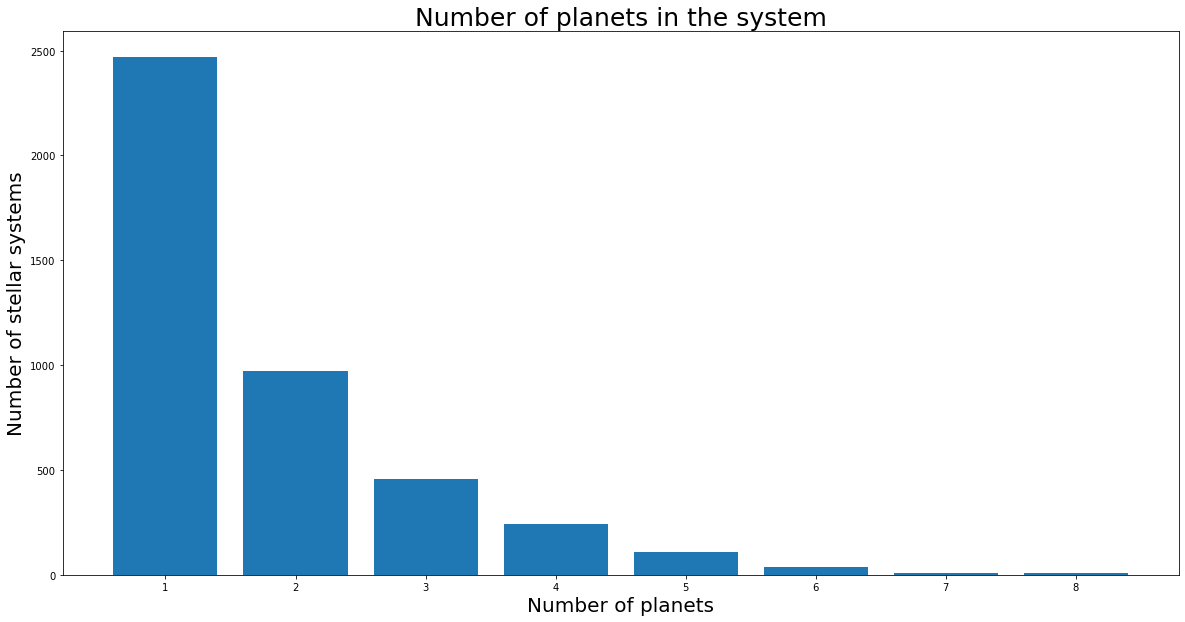

In [40]:
s2 = df.groupby(['Number of planets in the stellar system']).size()

plt.figure(figsize=(20,10))
plt.title('Number of planets in the system', fontsize=25)
plt.ylabel('Number of stellar systems', fontsize=20)
plt.xlabel('Number of planets', fontsize=20)
print(plt.bar(s2.index, s2.values))
sum = 0
for x in s2.index:
    sum += x*s2[x]
mean_planets= sum/s2.sum()

print()
print('Average number of planets in a stellar system: ' + str(round(mean_planets, 5)))
print('Percentage of stellar systems with 8 planets is ' + str(round(s2[8]/s2.sum()*100,5)) + '%')

2071.07905866889
0       True
1       True
2       True
3       True
4       True
        ... 
4296    True
4297    True
4298    True
4299    True
4300    True
Name: Days in a year, Length: 4301, dtype: bool
0.9655893978144617


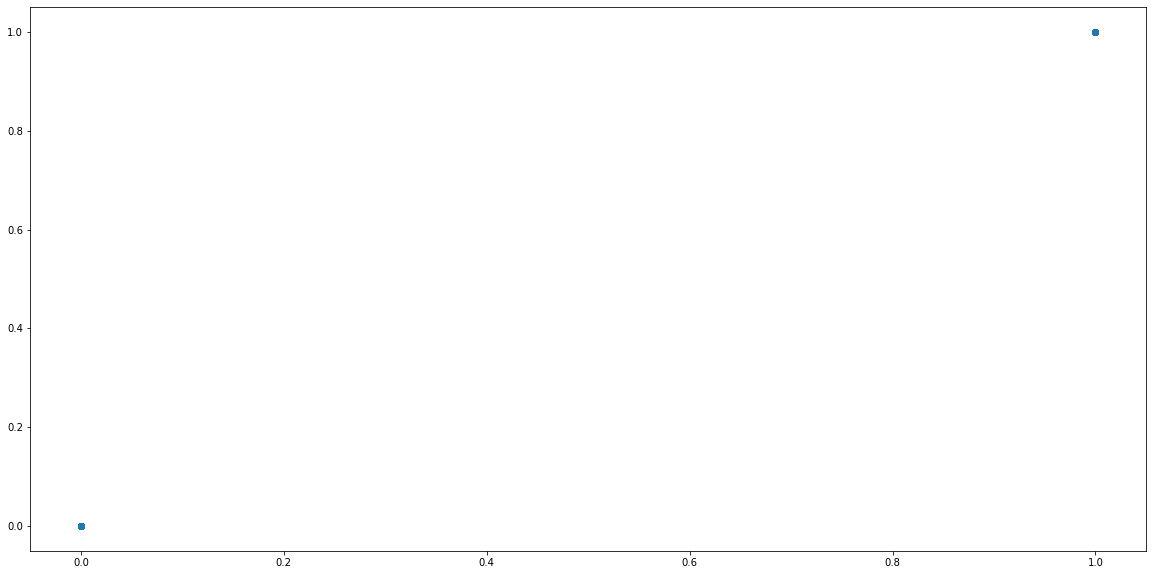

In [18]:
s3 = df['Days in a year']
s4 = df['Earth years in a year']
#df.drop(df.index[df['myvar'] == 'specific_name'], inplace = True)
print(s3.mean())

s3 = s3

# s3=s3.drop(s3.index[s3.values==max(s3.tolist())])
# s4=s4.drop(s3.index[s3.values==max(s3.tolist())])


print(s3.mean())


#print(s3[2416])

# print(s3)
# plt.title('Days in a year')
# print('Here: ' +str(s3))
# print(plt.plot(s3.index, s3.index))
plt.figure(figsize=(20,10))
plt.scatter(x=s3.tolist(), y=s3.tolist())

#WORK TO BE DONE

Earth's eccenticity: Ranges between 0.0034 and 0.058
Average eccentricity: 0.15656
Percentage of planets with a similar eccentricity to Earth: 14.90196%


(array([763., 297., 184., 101.,  64.,  50.,  26.,  22.,  17.,   6.]),
 array([0.   , 0.095, 0.19 , 0.285, 0.38 , 0.475, 0.57 , 0.665, 0.76 ,
        0.855, 0.95 ]),
 <a list of 10 Patch objects>)

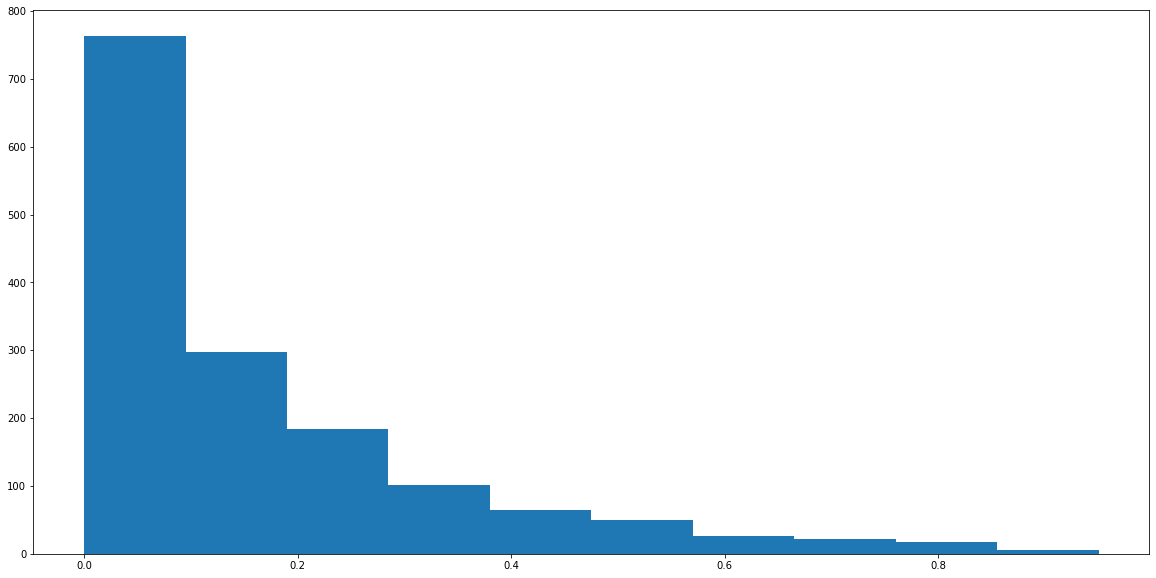

In [116]:
#Earth's eccentricity varies between 0.0034 and 0.058
s5 = df['Eccentricity']
s6 = s5==0

eccentricities_similar_to_earth = np.sum(s5.between(0.0034, 0.058, inclusive = True))

num_eccentricities_recorded = s5.notnull().sum()

percentage_similar_to_earth = eccentricities_similar_to_earth/num_eccentricities_recorded*100

print('Earth\'s eccenticity: Ranges between 0.0034 and 0.058')
print('Average eccentricity: ' + str(round(s5.mean(), 5)))
print('Percentage of planets with a similar eccentricity to Earth: ' + str(round(percentage_similar_to_earth, 5)) + '%')

plt.figure(figsize=(20,10))
plt.hist(s5, 10)

In [8]:
df.groupby('Kepler Field data').size()

Kepler Field data
0    1888
1    2413
dtype: int64

In [9]:
df['Days in a year'].mean()

2071.07905866889

Percentage of exoplanets discovered by the Kepler facility: 55.63822366891421


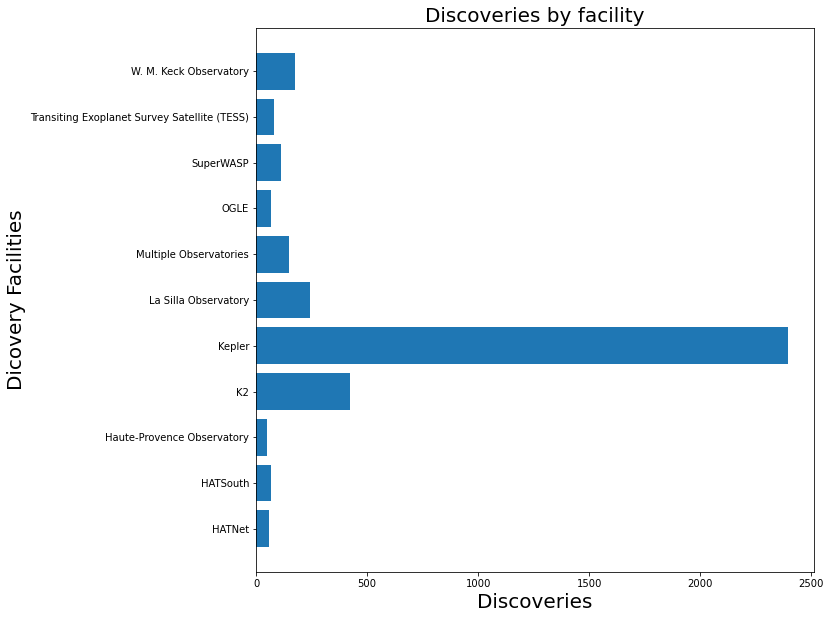

In [10]:
facilities = df.groupby('Discovery facility')
series = facilities.size()
series = series[series.values > 40]

plt.figure(figsize=(10,10))
plt.ylabel('Dicovery Facilities', fontsize=20)
plt.xlabel('Discoveries', fontsize=20)
plt.title('Discoveries by facility', fontsize=20)

plt.barh(series.index, series.values)

percentage_kepler = 100*(series.values.max() / facilities.size().values.sum())
print('Percentage of exoplanets discovered by the Kepler facility:', percentage_kepler)

([], <a list of 0 Text major ticklabel objects>)

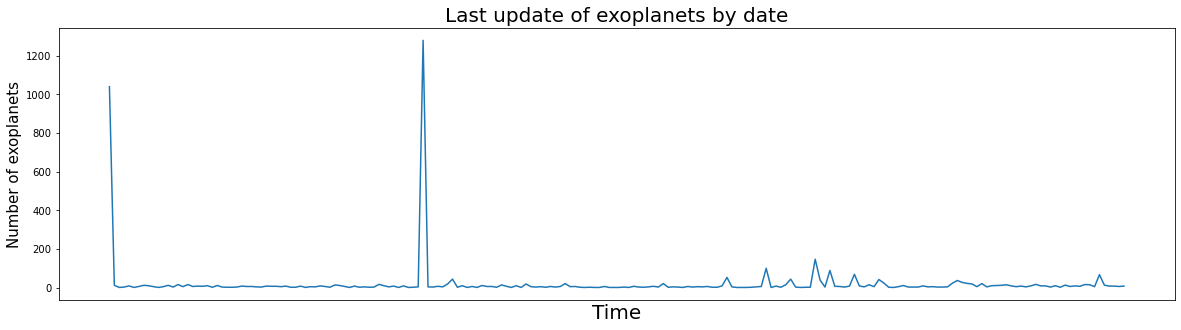

In [11]:
years = df.groupby('Date of last update')
years.size()

plt.figure(figsize=(20,5))


plt.plot(years.size().index, years.size().tolist())
plt.title('Last update of exoplanets by date', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of exoplanets', fontsize=15)
plt.xticks([])

Discovery method
Astrometry                          1
Disk Kinematics                     1
Eclipse Timing Variations          16
Imaging                            51
Microlensing                      105
Orbital Brightness Modulation       6
Pulsar Timing                       7
Pulsation Timing Variations         2
Radial Velocity                   821
Transit                          3270
Transit Timing Variations          21
dtype: int64
<BarContainer object of 11 artists>


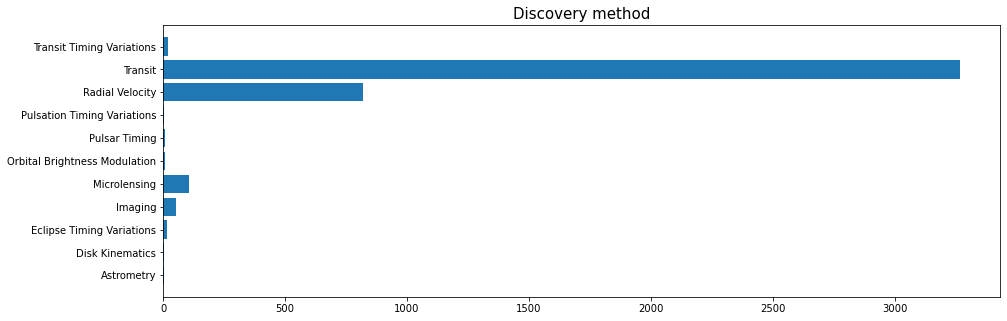

In [12]:
s1 = df.groupby(['Discovery method']).size()
print(s1)
plt.figure(figsize=(15,5))
plt.title('Discovery method', fontsize=15)
print(plt.barh(s1.index, s1.values))